<a href="https://colab.research.google.com/github/k-ganda/another/blob/main/folder/Heart_attack_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using a dataset for heart attack classsification

# **Variables**
**Age :** Age of the patient

**Sex :** Sex of the patient

**exang:** exercise induced angina (1 = yes; 0 = no)

**ca:** number of major vessels (0-3)

**cp :** Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

**trtbps :** resting blood pressure (in mm Hg)

**chol :** cholestoral in mg/dl fetched via BMI sensor

**fbs :** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg :** resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

**target :** 0= less chance of heart attack 1= more chance of heart attack


In [ ]:
# STEP 1: Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load the dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# We only have numerical values which is good. Let's find a summary.
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


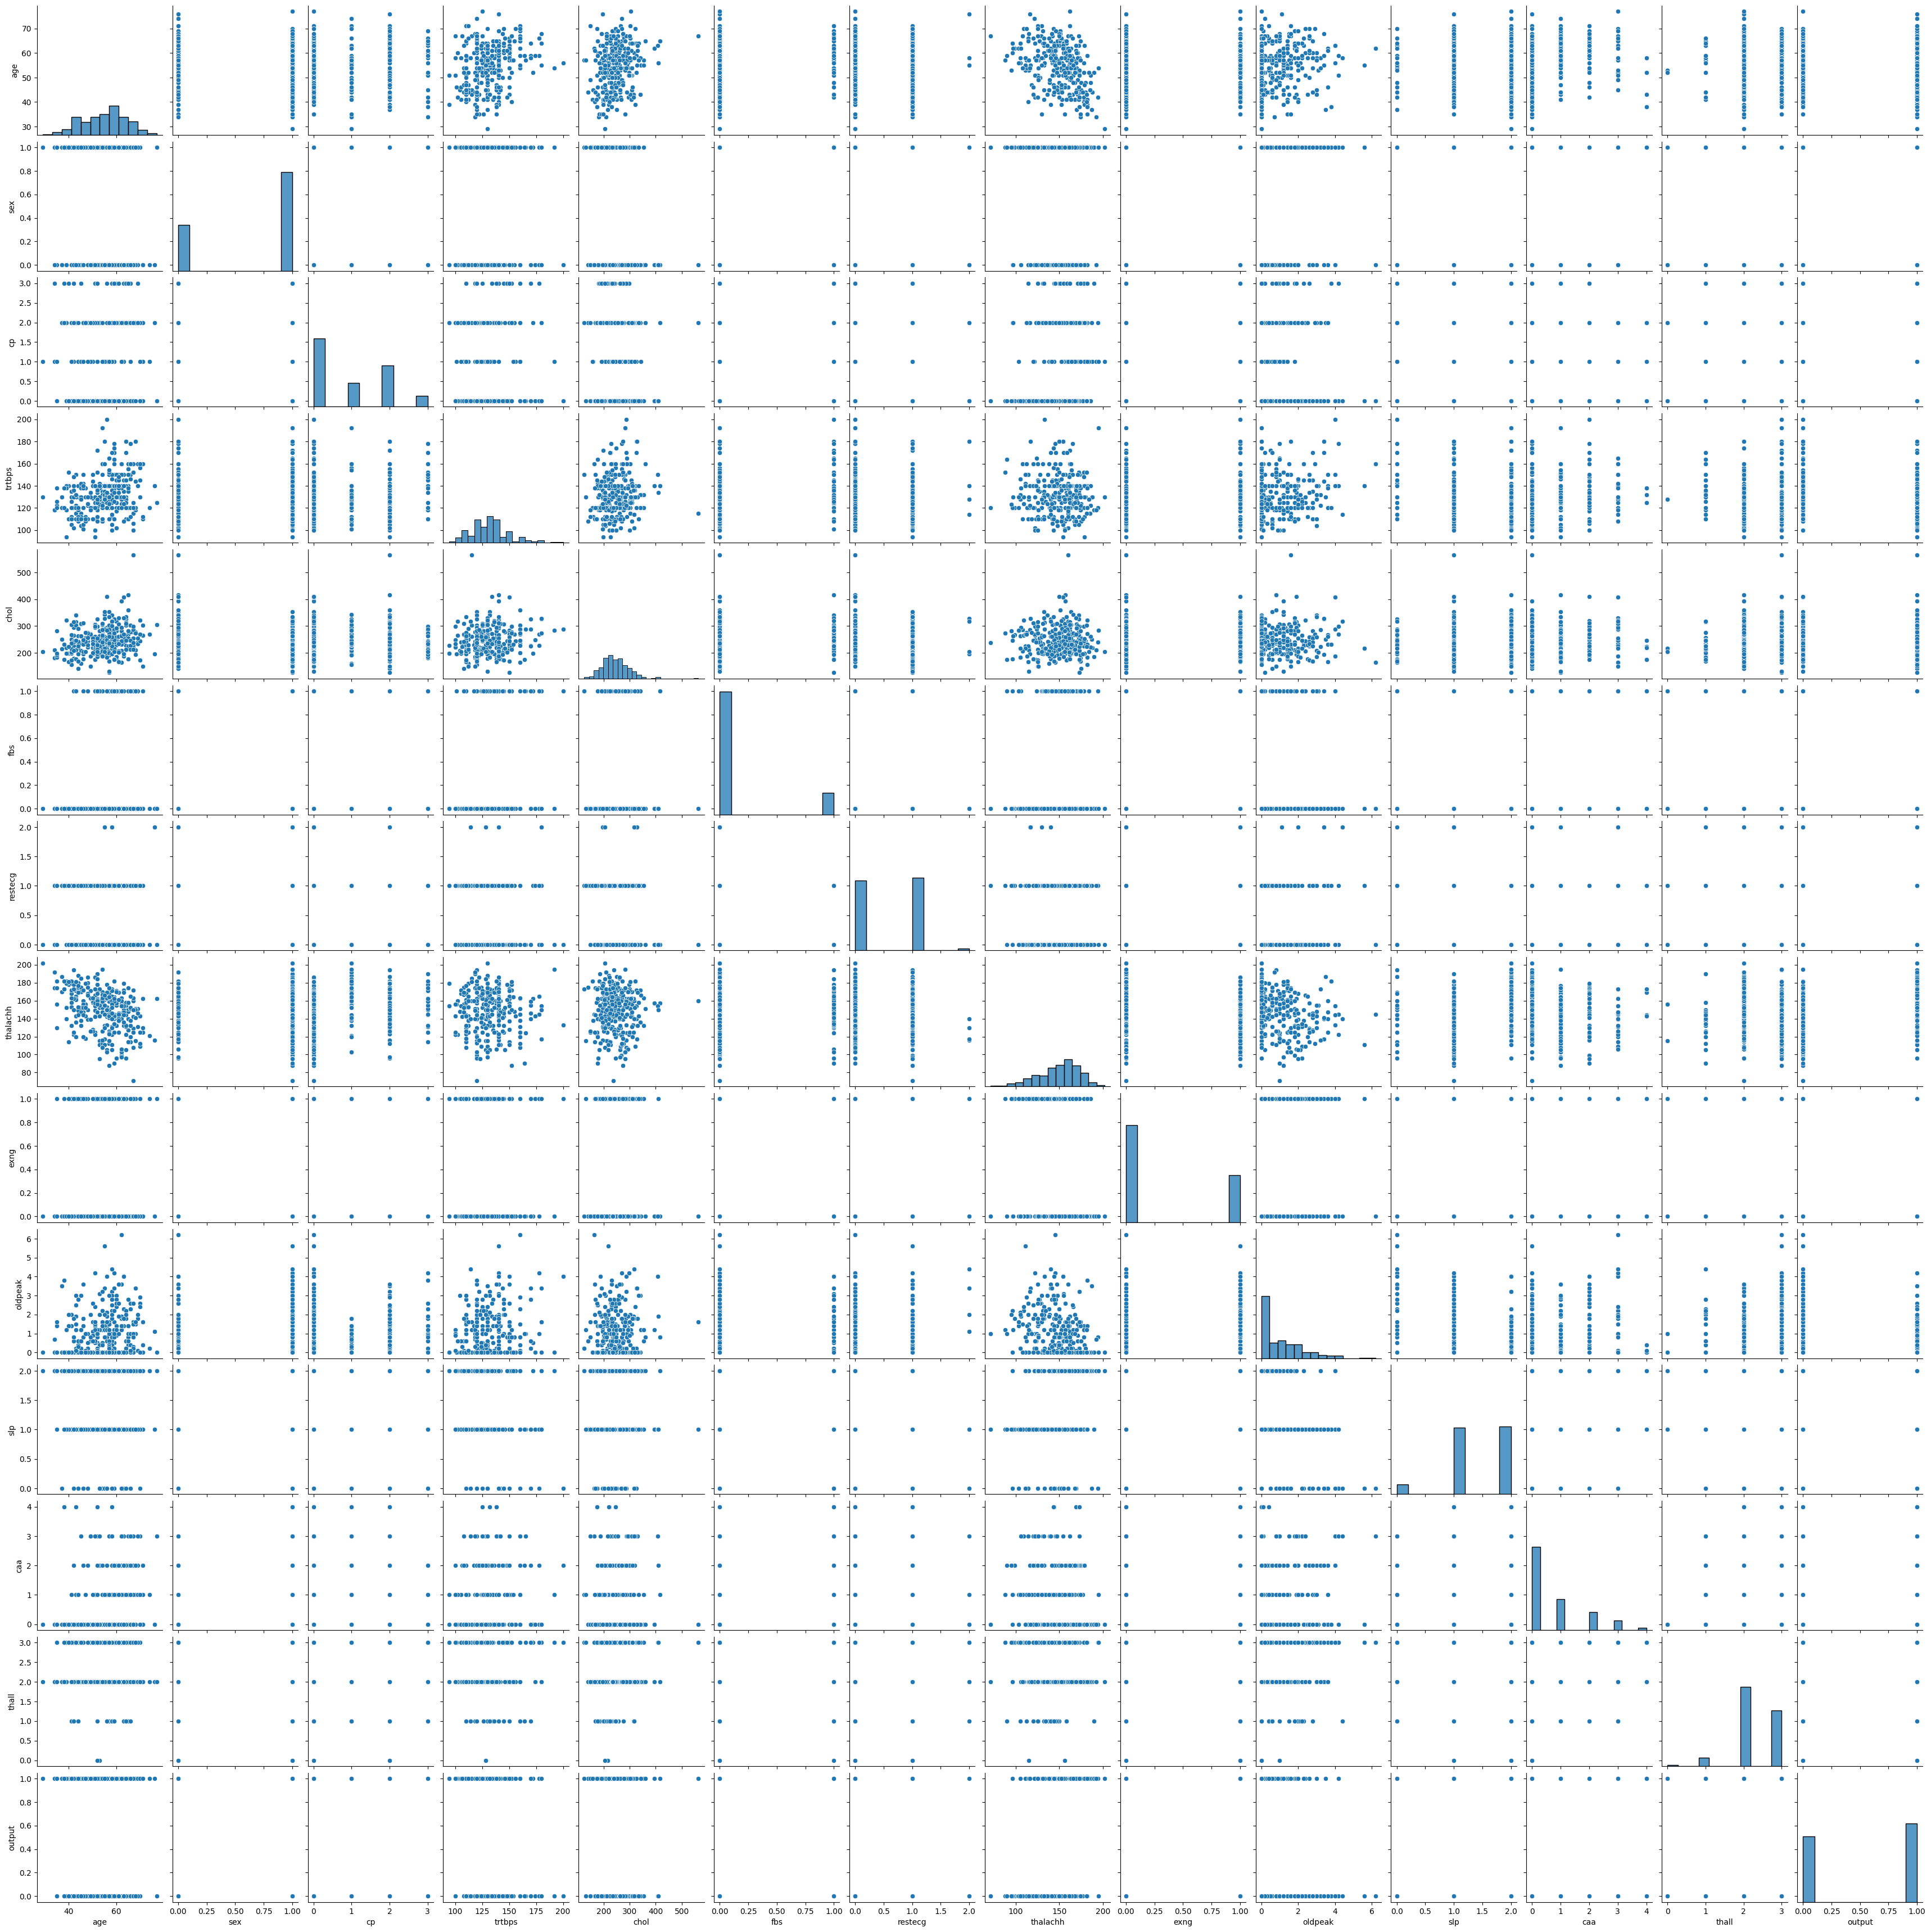

In [ ]:
#Let's now get the relationship between the variables to output
sns.pairplot(df)


In [ ]:
X = df.drop('output', axis=1)
y = df['output']

In [ ]:
# Scale our data
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

In [ ]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (212, 13)
y_train: (212,)
X_test: (46, 13)
y_test: (46,)


In [ ]:
# Now lets build our model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Print out the architecture of model
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Now lets train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.4592 - loss: 23.9231 - val_accuracy: 0.3556 - val_loss: 4.5590
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4311 - loss: 4.9355 - val_accuracy: 0.4889 - val_loss: 3.8014
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4431 - loss: 2.5618 - val_accuracy: 0.3778 - val_loss: 2.1946
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4167 - loss: 1.6955 - val_accuracy: 0.5778 - val_loss: 0.7833
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5637 - loss: 0.8825 - val_accuracy: 0.7333 - val_loss: 0.7877
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5916 - loss: 1.1164 - val_accuracy: 0.7556 - val_loss: 0.6352
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6102 - loss: 0.7824 - val_accuracy: 0.7333 - val_loss: 0.7079
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6455 - loss: 0.7788 - val_accuracy: 0.7111 - val_loss

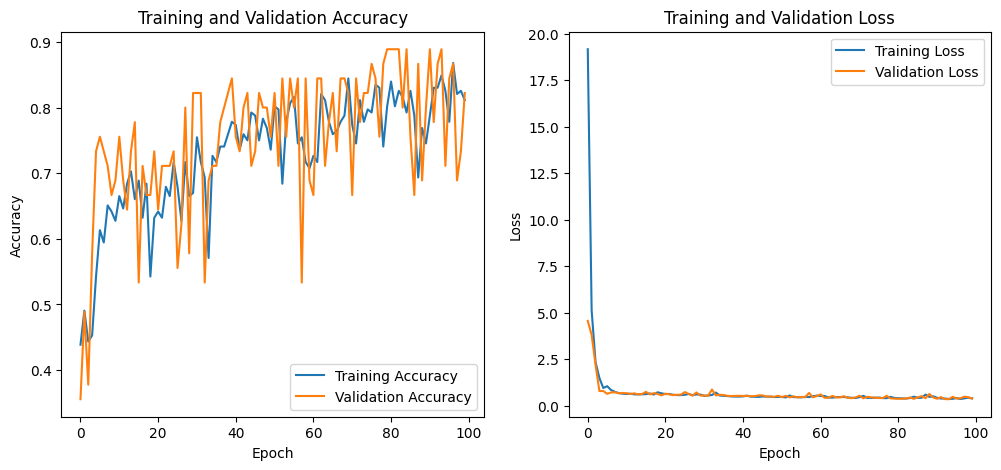

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 5))

# Training Accuracy vs Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Training Loss vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

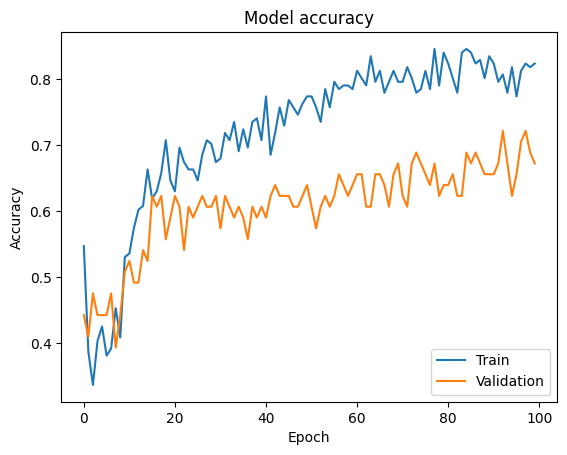

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

It appears that the accuracy is good at **80%**. However there's a discrepancy between training and validation, as the val loss flactuates more and doesn't decrease smoothly. Showing signs of overfitting.

some steps we can take:
1. Adding a kernel regularizer to dense layers(Perform both **L1 and L2 regularisation**).
2. **Dropout layers**
4. **early stopping**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Base model
def create_vanilla_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

history_vanilla = create_vanilla_model().fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.5801 - loss: 8.2071 - val_accuracy: 0.4590 - val_loss: 1.1728
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5155 - loss: 1.3611 - val_accuracy: 0.4590 - val_loss: 1.3994
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5165 - loss: 0.9770 - val_accuracy: 0.5246 - val_loss: 1.5072
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5627 - loss: 1.0363 - val_accuracy: 0.4098 - val_loss: 0.9540
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4680 - loss: 0.9288 - val_accuracy: 0.4754 - val_loss: 0.8637
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5653 - loss: 0.8128 - val_accuracy: 0.5574 - val_loss: 0.8400
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5401 - loss: 0.7285 - val_accuracy: 0.5574 - val_loss: 0.7197
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6286 - loss: 0.7091 - val_accuracy: 0.5738 - val_loss:

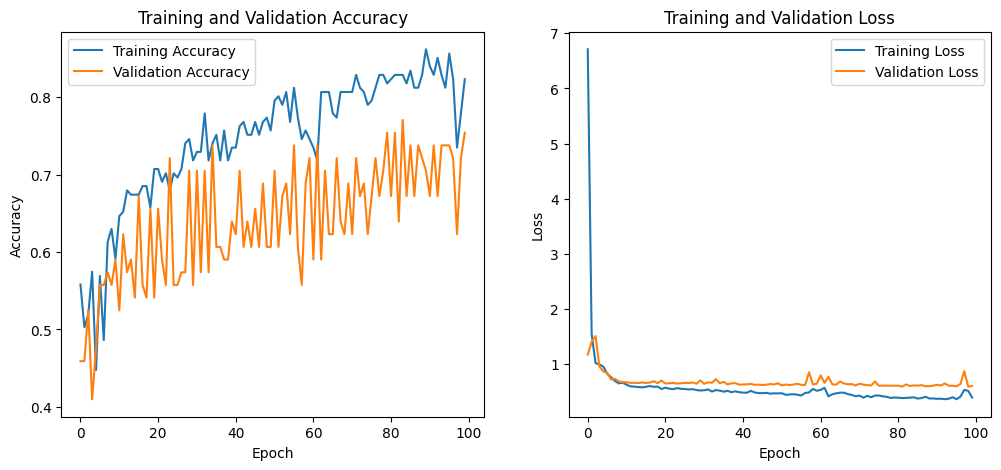

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 5))

# Training Accuracy vs Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_vanilla.history['accuracy'], label='Training Accuracy')
plt.plot(history_vanilla.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Training Loss vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_vanilla.history['loss'], label='Training Loss')
plt.plot(history_vanilla.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:

#from keras.callbacks import EarlyStopping

#L1 Regularization with Adam
from keras.regularizers import l1

def create_l1_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01), input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01)))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1(0.01)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

history_l1 = create_l1_model().fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5358 - loss: 12.7468 - val_accuracy: 0.5082 - val_loss: 6.9704
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5356 - loss: 6.4250 - val_accuracy: 0.5738 - val_loss: 5.8217
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5915 - loss: 5.8846 - val_accuracy: 0.5410 - val_loss: 5.0182
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5698 - loss: 5.1607 - val_accuracy: 0.5082 - val_loss: 4.8577
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6140 - loss: 4.8876 - val_accuracy: 0.6066 - val_loss: 4.8704
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5985 - loss: 4.8239 - val_accuracy: 0.6393 - val_loss: 4.5949
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6814 - loss: 4.5355 - val_accuracy: 0.5902 - val_loss: 4.5551
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6633 - loss: 4.4440 - val_accuracy: 0.6557 - val_loss: 4.3172
Epoch 

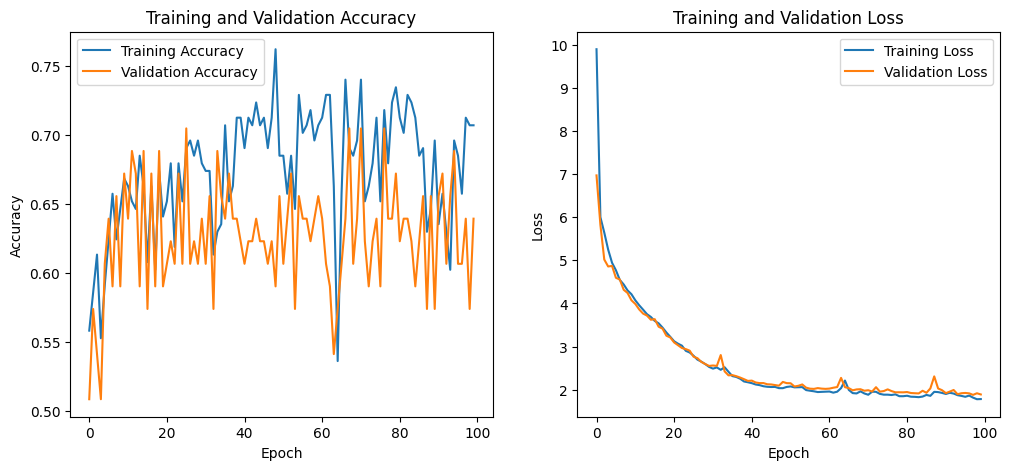

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 5))

# Training Accuracy vs Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_l1.history['accuracy'], label='Training Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Training Loss vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_l1.history['loss'], label='Training Loss')
plt.plot(history_l1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras import layers, models, regularizers

model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_dim=X_train.shape[1]))
model2.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_l2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5419 - loss: 24.3109 - val_accuracy: 0.5333 - val_loss: 6.8887
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6037 - loss: 3.7906 - val_accuracy: 0.4667 - val_loss: 5.2229
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4582 - loss: 4.1329 - val_accuracy: 0.5333 - val_loss: 2.6072
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5556 - loss: 2.4082 - val_accuracy: 0.7111 - val_loss: 1.3493
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5765 - loss: 1.7717 - val_accuracy: 0.6889 - val_loss: 1.3560
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6481 - loss: 1.5705 - val_accuracy: 0.6667 - val_loss: 1.3957
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6205 - loss: 1.3883 - val_accuracy: 0.6222 - val_loss: 1.3307
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5485 - loss: 1.3446 - val_accuracy: 0.6000 - val_loss: 1.2457
Epoch 9

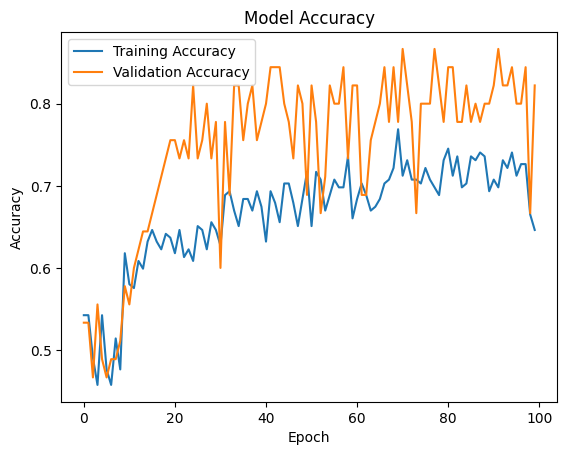

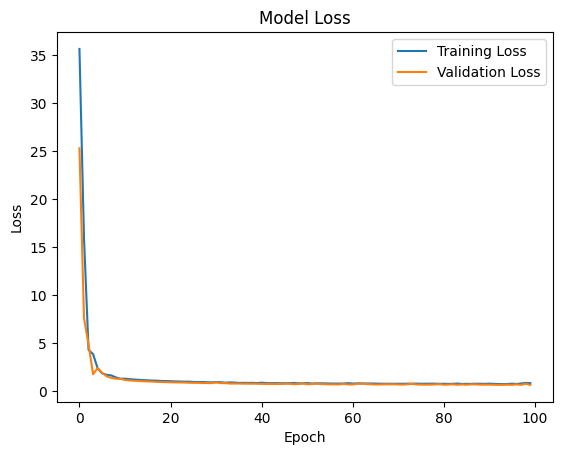

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_l2.history['accuracy'], label='Training Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history_l2.history['loss'], label='Training Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6576 - loss: 0.8912 
Test Accuracy: 0.6739, Test Loss: 0.8821


In [ ]:
#from keras.regularizers import l2
"""
def create_l2_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

history_l2 = create_l2_model().fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.4482 - loss: 32.3658 - val_accuracy: 0.4754 - val_loss: 21.0533
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4161 - loss: 21.0642 - val_accuracy: 0.4754 - val_loss: 11.8140
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3866 - loss: 12.3590 - val_accuracy: 0.4754 - val_loss: 7.5899
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3939 - loss: 7.2404 - val_accuracy: 0.4262 - val_loss: 3.2620
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4711 - loss: 4.5006 - val_accuracy: 0.5246 - val_loss: 3.3944
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5129 - loss: 4.0209 - val_accuracy: 0.4918 - val_loss: 2.6850
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3701 - loss: 3.0994 - val_accuracy: 0.4754 - val_loss: 2.1605
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3997 - loss: 2.2056 - val_accuracy: 0.5574 - val_l

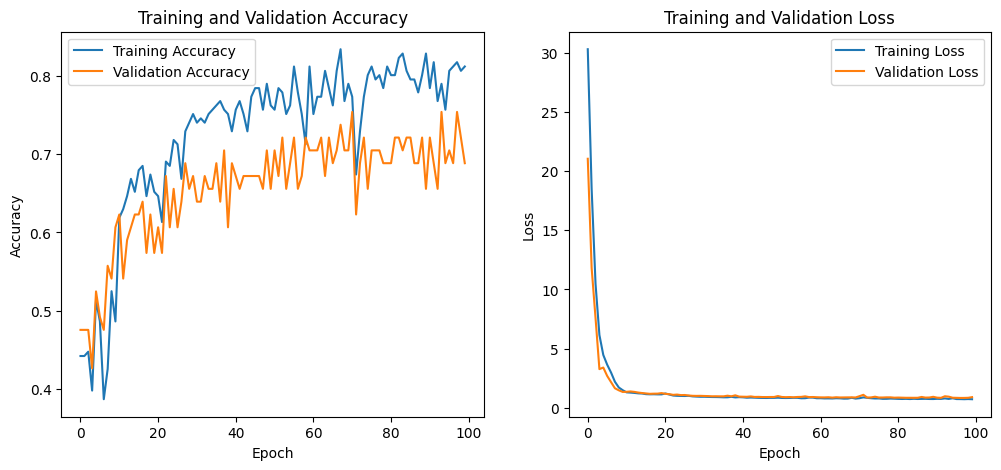

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 5))

# Training Accuracy vs Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_l2.history['accuracy'], label='Training Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Training Loss vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_l2.history['loss'], label='Training Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from keras.layers import Dropout

def create_dropout_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.5))  # Add dropout layer
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))  # Add dropout layer
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

history_dropout = create_dropout_model().fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4153 - loss: 50.9035 - val_accuracy: 0.4754 - val_loss: 12.7724
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4398 - loss: 25.3087 - val_accuracy: 0.4754 - val_loss: 4.4013
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5329 - loss: 17.0433 - val_accuracy: 0.5410 - val_loss: 1.1104
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5475 - loss: 12.9223 - val_accuracy: 0.5246 - val_loss: 3.3546
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5076 - loss: 11.3377 - val_accuracy: 0.5246 - val_loss: 4.4181
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4640 - loss: 12.0058 - val_accuracy: 0.5246 - val_loss: 3.9874
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5320 - loss: 9.9309 - val_accuracy: 0.5246 - val_loss: 2.5105
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5653 - loss: 7.5536 - val_accuracy: 0.5574 - val_lo

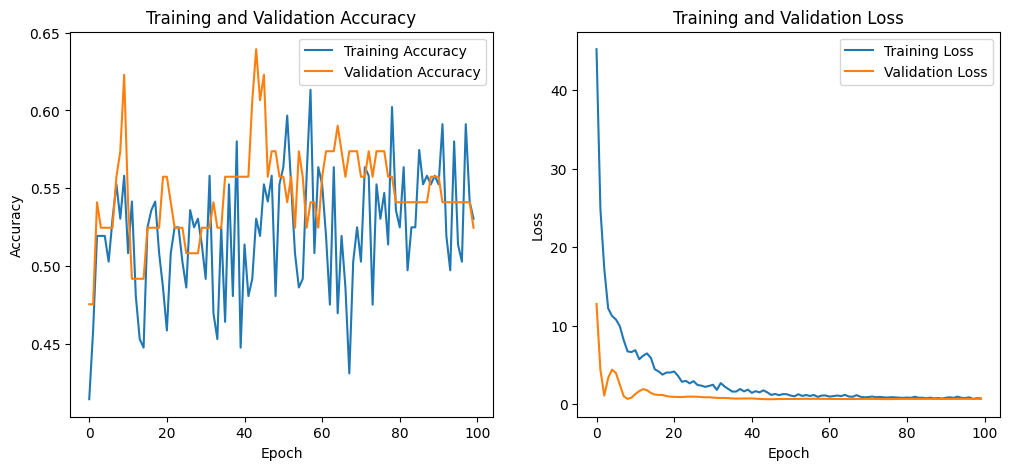

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 5))

# Training Accuracy vs Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Training Loss vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['loss'], label='Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
def create_early_stopping_model():
    model = create_vanilla_model()  # Use the base model
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    return model, early_stopping

model_es, es_callback = create_early_stopping_model()
history_es = model_es.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[es_callback], verbose=1)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5130 - loss: 1.4151 - val_accuracy: 0.6066 - val_loss: 0.7713
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6368 - loss: 0.8555 - val_accuracy: 0.5902 - val_loss: 0.7806
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6515 - loss: 0.7330 - val_accuracy: 0.6066 - val_loss: 0.7259
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6680 - loss: 0.7011 - val_accuracy: 0.5574 - val_loss: 0.8020
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6130 - loss: 0.7148 - val_accuracy: 0.5902 - val_loss: 0.7168
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6368 - loss: 0.7037 - val_accuracy: 0.5574 - val_loss: 0.7851
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7032 - loss: 0.5935 - val_accuracy: 0.6066 - val_loss: 0.7176
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6624 - loss: 0.6939 - val_accuracy: 0.6066 - val_loss: 0.6938
Epoch 9/

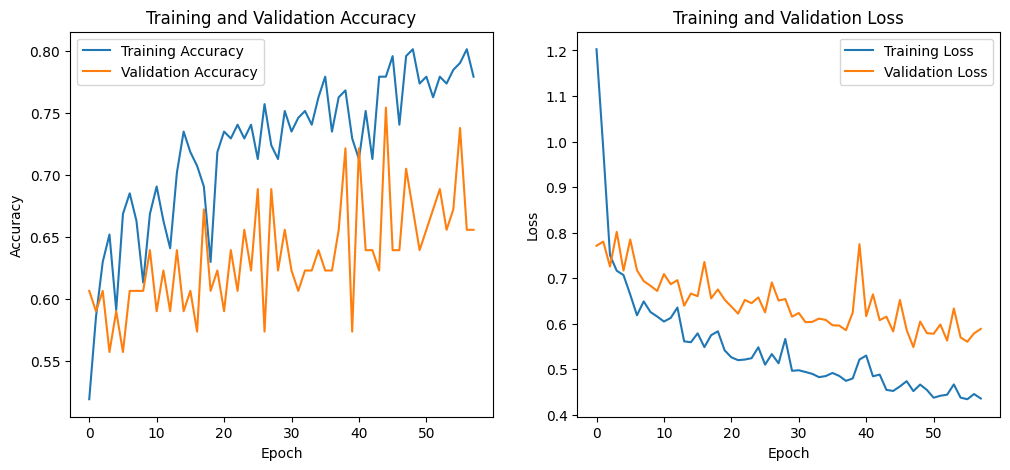

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 5))

# Training Accuracy vs Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_es.history['accuracy'], label='Training Accuracy')
plt.plot(history_es.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Training Loss vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_es.history['loss'], label='Training Loss')
plt.plot(history_es.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
def create_rmsprop_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

history_rmsprop = create_rmsprop_model().fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.5354 - loss: 3.2695 - val_accuracy: 0.4590 - val_loss: 1.3065
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4499 - loss: 1.6407 - val_accuracy: 0.4590 - val_loss: 1.0661
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5467 - loss: 0.9815 - val_accuracy: 0.4754 - val_loss: 1.4239
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4929 - loss: 1.5631 - val_accuracy: 0.5246 - val_loss: 1.6473
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5235 - loss: 1.3384 - val_accuracy: 0.5246 - val_loss: 0.8439
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4167 - loss: 1.3080 - val_accuracy: 0.5246 - val_loss: 0.9666
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5403 - loss: 0.9030 - val_accuracy: 0.5246 - val_loss: 0.9431
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5246 - loss: 1.0219 - val_accuracy: 0.5410 - val_loss

In [ ]:
# using dropout layers and seeing how our model improves its accuracy
# Dropout(0.5) randomly drops 50% of the neurons during training. You can experiment with different dropout rates (0.3–0.5 is common).
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  # Add dropout after the first layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))  # Add another dropout layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Now lets train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5390 - loss: 24.0472 - val_accuracy: 0.5082 - val_loss: 7.8017
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4831 - loss: 36.6535 - val_accuracy: 0.5082 - val_loss: 6.2405
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4765 - loss: 29.5814 - val_accuracy: 0.5082 - val_loss: 5.2880
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4371 - loss: 19.5721 - val_accuracy: 0.4918 - val_loss: 4.5556
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5124 - loss: 23.6263 - val_accuracy: 0.4918 - val_loss: 3.5192
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5697 - loss: 15.2436 - val_accuracy: 0.5082 - val_loss: 3.0534
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4915 - loss: 15.2136 - val_accuracy: 0.4918 - val_loss: 2.6503
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6004 - loss: 12.5098 - val_accuracy: 0.4590 - val_loss: 2.3607

In [ ]:
# Updated model with smaller dropout rates, more neurons, and learning rate adjustments
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_initializer='he_normal'))
model.add(Dropout(0.3))  # Reducing dropout to 30%
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))  # Reducing dropout to 30%
model.add(Dense(1, activation='sigmoid'))

# Compiling with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5244 - loss: 63.2823 - val_accuracy: 0.4754 - val_loss: 15.5762
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4664 - loss: 38.1188 - val_accuracy: 0.5246 - val_loss: 18.2767
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5047 - loss: 39.2436 - val_accuracy: 0.5082 - val_loss: 11.5066
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4970 - loss: 34.9777 - val_accuracy: 0.5738 - val_loss: 2.7610
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5038 - loss: 29.3148 - val_accuracy: 0.5410 - val_loss: 2.3057
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5155 - loss: 28.9746 - val_accuracy: 0.5410 - val_loss: 2.7004
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3257 - loss: 34.4741 - val_accuracy: 0.6557 - val_loss: 1.3784
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4852 - loss: 26.0492 - val_accuracy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#!/usr/bin/env python3
"""Importing tensorflow"""
import tensorflow as tf


def calculate_loss(y, y_pred):
    """
    Calculates the softmax crossentropy loss
    y- placeholder labels for imput
    y_pred: tensor with networks predictions
    Returns: Tensor containing loss
    """
    loss = tf.reduce_mean(
        tf.losses.softmax_cross_entropy(
           labels=y, logits=y_pred))
    return loss

In [ ]:
#!/usr/bin/env python3

import tensorflow as tf



x, y = create_placeholders(784, 10)
y_pred = forward_prop(x, [256, 256, 10], [tf.nn.tanh, tf.nn.tanh, None])
loss = calculate_loss(y, y_pred)
print(loss)

NameError: name 'create_placeholders' is not defined